In [ ]:
# pip3 install --upgrade networkx

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from itertools import islice
%matplotlib inline

In [2]:
HUB_DEGREE = 650
DATA_DIR = 'UIUC/'

user_edges_file = DATA_DIR + 'user_edges.txt'
# user_vertices_file = DATA_DIR + 'user_vertices_2011-07-13.txt'

In [3]:
# with open(user_vertices_file, 'r') as f:
#     vertices_and_addresses = f.read().splitlines()
with open(user_edges_file, 'r') as f:
#      transactions = [next(f).strip('\n') for x in range(500)]
    transactions = f.read().splitlines()
# vertex2keys = {(idx+1): len(addresses.split('\t')) for idx, addresses in enumerate(vertices_and_addresses)}

In [4]:
transactions_list = [t.split(',') for t in transactions]
transactions_df = pd.DataFrame(transactions_list, columns=['trans_id', 'sender', 'receiver', 'date', 'BTC'])
print(transactions_df.head())
transactions_df[['trans_id','sender', 'receiver']] = transactions_df[['trans_id','sender', 'receiver']].astype('int')
transactions_df['BTC'] = transactions_df['BTC'].astype('float')
del transactions
del transactions_list

  trans_id  sender receiver            date           BTC
0        1       2        2  20130410142250        24.375
1        1       2   782477  20130410142250        0.7709
2        2  620423  4571210  20111227114312  614.17495129
3        2  620423        3  20111227114312   128.0405196
4        3       3   782479  20130410142250    47.1405196


In [5]:
from collections import defaultdict

hubs_to_include = []
in_degree = defaultdict(int)
out_degree = defaultdict(int)

sender_counts = transactions_df['sender'].value_counts()
sender_keys, sender_values = sender_counts.keys().to_list(), sender_counts.to_list()

receiver_counts = transactions_df['receiver'].value_counts()
receiver_keys, receiver_values = receiver_counts.keys().to_list(), receiver_counts.to_list()



for a, b in zip(sender_keys, sender_values) :
    in_degree[a] += b
for a, b in zip(receiver_keys, receiver_values):
    out_degree[a] += b
    if in_degree[a] + out_degree[a] >= HUB_DEGREE:
        hubs_to_include.append(a)
print(f'Number of hubs to include: {len(hubs_to_include)}')

Number of hubs to include: 6057


In [6]:
print(f'Shape before filter: {transactions_df.shape}')
transactions_df = transactions_df[(transactions_df['sender'].isin(hubs_to_include)) | (transactions_df['receiver'].isin(hubs_to_include))]
print(f'Shape after filter: {transactions_df.shape}')

Shape before filter: (37450461, 5)
Shape after filter: (26675968, 5)


In [7]:
in_transaction = defaultdict(list)
out_transaction = defaultdict(list)
children_in_degree = defaultdict(list)
children_out_degree = defaultdict(list)
def update_transaction_dicts(row):
    sender = row['sender']
    receiver = row['receiver']
    btc = row['BTC']
    in_transaction[receiver].append(btc)
    if sender != receiver:    
        out_transaction[sender].append(btc)
    
    children_in_degree[sender].append(in_degree[receiver])
    children_out_degree[sender].append(out_degree[receiver])

_ = transactions_df.apply(update_transaction_dicts, axis=1)

In [8]:
nodes_df = pd.DataFrame(hubs_to_include, columns=['node'])
nodes_df.head()

,node
0,25
1,11
2,1374
3,74
4,29


In [9]:
# g = nx.from_pandas_edgelist(transactions_df, 'sender', 'receiver', ['BTC', 'date'], create_using=nx.MultiDiGraph())
# # layout = nx.spring_layout(g,iterations=50)
# # nx.draw(g, layout)
# del transactions_df

In [10]:
# nodes_to_include = []
# for node in g.nodes():
#     degree = g.in_degree(node) + g.out_degree(node)
# #     print(node, g.in_degree(node) + g.out_degree(node))
#     if degree >= HUB_DEGREE:
#         nodes_to_include.append(node)
# print(f'Number of nodes to include: {len(nodes_to_include)}')
# # removing non-hub nodes makes the graph sparse and the hubs lose their characteristics
# # lets 
# # for node in nodes_to_exclude:
# #     g.remove_node(node)

In [11]:
# def get_degrees(node, g):
    
#     in_degree = g.in_degree(node)
#     out_degree = g.out_degree(node)
#     degree = in_degree + out_degree
    
#     return in_degree, out_degree, degree

# def get_features(node, g):
#     features = {}
    
#     in_degree, out_degree, degree = get_degrees(node, g)

#     features['in_degree'] = in_degree
#     features['out_degree'] = out_degree
#     features['degree'] = degree
# #     features['num_public_keys'] = vertex2keys[node]
    
#     children_in_degrees = []
#     children_out_degrees = []
#     children_degrees = []

#     in_nodes = list(g.predecessors(node))
#     out_nodes = list(g.successors(node))
    
# #     features['unique_in_degree'] = len(in_nodes)
# #     features['unique_out_degree'] = len(out_nodes)
    
#     in_trasaction = []
#     out_transaction = []
#     _transaction = []

#     features['mean_in_BTC'] = 0
#     features['mean_out_BTC'] = 0
#     features['mean_BTC'] = 0
#     features['var_in_BTC'] = 0
#     features['var_out_BTC'] = 0
#     features['var_BTC'] = 0
    
#     features['children_mean_in_degree'] = 0
#     features['children_mean_out_degree'] = 0
#     features['children_mean_degree'] = 0
#     features['children_var_in_degree'] = 0
#     features['children_var_out_degree'] = 0
#     features['children_var_degree'] = 0
    
    
    
#     if len(in_nodes):
#         for in_node in in_nodes:
#             for _, transaction in g[in_node][node].items():
#                 in_trasaction.append(transaction['BTC'])
# #         print(in_trasaction)
#         features['mean_in_BTC'] = np.mean(in_trasaction)
#         features['var_in_BTC'] = np.var(in_trasaction)
#         _transaction += in_trasaction

#     if len(out_nodes):
#         for out_node in out_nodes:
#             c_in_degree, c_out_degree, c_degree = get_degrees(out_node, g)
#             children_in_degrees.append(c_in_degree)
#             children_out_degrees.append(c_out_degree)
#             children_degrees.append(c_degree)
#             for _, transaction in g[node][out_node].items():
#                 out_transaction.append(transaction['BTC'])
        
#         features['mean_out_BTC'] = np.mean(out_transaction)
#         features['var_out_BTC'] = np.var(out_transaction)
        
#         features['children_mean_in_degree'] = np.mean(children_in_degrees)
#         features['children_mean_out_degree'] = np.mean(children_out_degrees)
#         features['children_mean_degree'] = np.mean(children_degrees)
#         features['children_var_in_degree'] = np.var(children_in_degrees)
#         features['children_var_out_degree'] = np.var(children_out_degrees)
#         features['children_var_degree'] = np.var(children_degrees)
    
#         _transaction += out_transaction
    
#     if transaction:
#         features['mean_BTC'] = np.mean(_transaction)
#         features['var_BTC'] = np.var(_transaction)
    
    
    
# #     features['balance'] = np.sum(in_trasaction) - np.sum(out_transaction)
#     return pd.Series(list(features.values()))
    

In [12]:
features = ['in_degree', 'out_degree', 'degree', \
#             'unique_in_degree', 'unique_out_degree', 'balance'
            'mean_in_btc', 'mean_out_btc', 'mean_btc',\
            'var_in_btc', 'var_out_btc', 'var_btc',\
            'children_mean_in_degree', 'children_mean_out_degree',\
            'children_mean_degree', 'children_var_in_degree',\
            'children_var_out_degree', 'children_var_degree' ]

In [13]:
# nodes_df[features] = nodes_df.apply(lambda row: get_features(row['Node'], g), axis=1)no
nodes_df['in_degree'] = nodes_df['node'].map(lambda x: in_degree[x])
nodes_df['out_degree'] = nodes_df['node'].map(lambda x: out_degree[x])
nodes_df['degree'] = nodes_df['in_degree'] + nodes_df['out_degree']

nodes_df['mean_in_btc'] = nodes_df['node'].map(lambda x: np.mean(in_transaction[x]))
nodes_df['mean_out_btc'] = nodes_df['node'].map(lambda x: np.mean(out_transaction[x]))
nodes_df['mean_btc'] = nodes_df['node'].map(lambda x: np.mean(in_transaction[x] + out_transaction[x]))

nodes_df['var_in_btc'] = nodes_df['node'].map(lambda x: np.var(in_transaction[x]))
nodes_df['var_out_btc'] = nodes_df['node'].map(lambda x: np.var(out_transaction[x]))
nodes_df['var_btc'] = nodes_df['node'].map(lambda x: np.var(in_transaction[x] + out_transaction[x]))

nodes_df['children_mean_in_degree'] = nodes_df['node'].map(lambda x: np.mean(children_in_degree[x]))
nodes_df['children_mean_out_degree'] = nodes_df['node'].map(lambda x: np.mean(children_out_degree[x]))
nodes_df['children_mean_degree'] = nodes_df['node'].map(lambda x: np.mean(children_in_degree[x] + children_out_degree[x]))

nodes_df['children_var_in_degree'] = nodes_df['node'].map(lambda x: np.var(children_in_degree[x]))
nodes_df['children_var_out_degree'] = nodes_df['node'].map(lambda x: np.var(children_out_degree[x]))
nodes_df['children_var_degree'] = nodes_df['node'].map(lambda x: np.var(children_in_degree[x] + children_out_degree[x]))

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
nodes_df = nodes_df.fillna(0)
nodes_df.head(15)

,node,in_degree,out_degree,degree,mean_in_btc,mean_out_btc,mean_btc,var_in_btc,var_out_btc,var_btc,children_mean_in_degree,children_mean_out_degree,children_mean_degree,children_var_in_degree,children_var_out_degree,children_var_degree
0,25,8196276,8215313,16411589,1.605131,0.929180,1.380994,7.125057e+01,2.198383e+02,1.206217e+02,4.125216e+06,4.134903e+06,4.130060e+06,1.675805e+13,1.683519e+13,1.679664e+13
1,11,532534,777380,1309914,67.477911,67.652830,67.541555,1.913203e+07,1.489978e+07,1.759214e+07,1.252646e+05,1.802565e+05,1.527606e+05,2.338712e+11,2.787596e+11,2.570715e+11
2,1374,1344435,684021,2028456,34.201703,1.219774,17.831143,2.518375e+03,4.174178e+01,1.561037e+03,6.988891e+05,3.855341e+05,5.422116e+05,4.268529e+11,1.153399e+11,2.956442e+11
3,74,122034,473382,595416,4.484503,27.300659,7.277824,1.498252e+03,1.665208e+04,3.409425e+03,1.057680e+05,2.940609e+05,1.999144e+05,1.564808e+11,1.967223e+11,1.854651e+11
4,29,234864,470445,705309,11.332268,34.366805,16.898355,1.865357e+03,7.204859e+04,1.892173e+04,1.048287e+05,2.053553e+05,1.550920e+05,7.228544e+10,1.121908e+11,9.476450e+10
5,27,90330,208076,298406,9.920218,38.381184,15.570402,1.177491e+04,4.840236e+04,1.917522e+04,7.268052e+04,1.414125e+05,1.070465e+05,4.600384e+10,6.462605e+10,5.649597e+10
6,12564,114161,185954,300115,19.736675,44.986004,27.325529,4.387976e+03,7.587182e+04,2.600695e+04,7.640904e+04,1.247772e+05,1.005931e+05,2.107548e+10,4.570668e+10,3.397595e+10
7,12061,873,121978,122851,0.013379,1.614401,0.023344,3.438146e-05,7.283551e-01,2.042339e-02,1.098855e+02,1.537717e+04,7.743527e+03,8.308973e+04,1.621291e+09,8.689594e+08
8,366,10005,110785,120790,0.389570,7.878963,0.723124,2.744117e+00,8.723993e+02,4.386265e+01,3.135199e+04,6.792064e+04,4.963631e+04,2.364687e+09,2.362445e+09,2.697882e+09
9,97650,70787,96182,166969,0.692271,1.119401,0.849083,1.225855e+01,9.978489e+01,4.443430e+01,1.801473e+04,2.351244e+04,2.076358e+04,7.894011e+08,1.467654e+09,1.136084e+09


In [15]:
children_in_degree[11]

[2,
 234864,
 0,
 10015,
 2,
 33275,
 83,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 234864,
 0,
 2,
 24,
 2,
 2,
 3,
 2,
 2,
 13172,
 2,
 2,
 0,
 2,
 0,
 74,
 4,
 532534,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 4,
 0,
 0,
 2,
 7,
 0,
 173,
 0,
 1,
 0,
 90330,
 0,
 0,
 532534,
 9157,
 8511,
 2,
 2,
 0,
 0,
 532534,
 2,
 3,
 0,
 0,
 2,
 2,
 1,
 1958,
 0,
 1632,
 0,
 234864,
 532534,
 234864,
 0,
 532534,
 2,
 0,
 90330,
 0,
 234864,
 2,
 7390,
 0,
 0,
 234864,
 0,
 0,
 90330,
 532534,
 532534,
 2,
 0,
 0,
 532534,
 532534,
 0,
 532534,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 234864,
 0,
 2,
 2,
 2,
 90330,
 2,
 2,
 0,
 4,
 2,
 90330,
 2,
 2,
 38,
 3671,
 2,
 36400,
 0,
 2,
 0,
 2,
 0,
 19,
 0,
 8,
 0,
 11,
 2,
 0,
 4,
 0,
 0,
 2,
 90330,
 0,
 2,
 0,
 0,
 0,
 1958,
 0,
 532534,
 90330,
 2,
 16,
 2,
 0,
 2,
 9,
 2,
 2,
 2,
 0,
 90330,
 532534,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 234864,
 2,
 7390,
 0,
 532534,
 90330,
 2,
 18,
 18,
 2,
 18,
 532534,
 64,
 2,
 0,
 0,
 532534,
 2,
 0,
 0,
 532534,
 4,

In [16]:
nodes_df.to_csv('uiuc_features_or.csv', index=False)

In [17]:
nodes_df = pd.read_csv('uiuc_features_or.csv')
nodes_df.head()

,node,in_degree,out_degree,degree,mean_in_btc,mean_out_btc,mean_btc,var_in_btc,var_out_btc,var_btc,children_mean_in_degree,children_mean_out_degree,children_mean_degree,children_var_in_degree,children_var_out_degree,children_var_degree
0,25,8196276,8215313,16411589,1.605131,0.929180,1.380994,7.125057e+01,2.198383e+02,1.206217e+02,4.125216e+06,4.134903e+06,4.130060e+06,1.675805e+13,1.683519e+13,1.679664e+13
1,11,532534,777380,1309914,67.477911,67.652830,67.541555,1.913203e+07,1.489978e+07,1.759214e+07,1.252646e+05,1.802565e+05,1.527606e+05,2.338712e+11,2.787596e+11,2.570715e+11
2,1374,1344435,684021,2028456,34.201703,1.219774,17.831143,2.518375e+03,4.174178e+01,1.561037e+03,6.988891e+05,3.855341e+05,5.422116e+05,4.268529e+11,1.153399e+11,2.956442e+11
3,74,122034,473382,595416,4.484503,27.300659,7.277824,1.498252e+03,1.665208e+04,3.409425e+03,1.057680e+05,2.940609e+05,1.999144e+05,1.564808e+11,1.967223e+11,1.854651e+11
4,29,234864,470445,705309,11.332268,34.366805,16.898355,1.865357e+03,7.204859e+04,1.892173e+04,1.048287e+05,2.053553e+05,1.550920e+05,7.228544e+10,1.121908e+11,9.476450e+10


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = nodes_df[features].values
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.97816053e-01
  9.97809486e-01 9.97833127e-01]
 [6.49726778e-02 9.46256210e-02 7.97799565e-02 ... 1.39252764e-02
  1.65218825e-02 1.52717676e-02]
 [1.64029981e-01 8.32615974e-02 1.23564288e-01 ... 2.54158863e-02
  6.83611062e-03 1.75632483e-02]
 ...
 [1.42869762e-04 0.00000000e+00 3.18080519e-05 ... 6.31378789e-04
  1.97332521e-03 1.32050055e-03]
 [1.52020259e-04 0.00000000e+00 3.63781743e-05 ... 5.65951389e-04
  2.15206934e-03 1.39038527e-03]
 [1.11392052e-04 0.00000000e+00 1.60868309e-05 ... 7.19921778e-04
  2.28010851e-03 1.52573106e-03]]


Text(0.5, 1.0, 'Elbow Method For Optimal k')

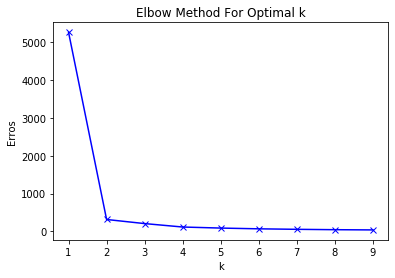

In [19]:
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
from sklearn.cluster import KMeans
error = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    error.append(km.inertia_)

plt.plot(K, error, 'bx-')
plt.xlabel('k')
plt.ylabel('Erros')
plt.title('Elbow Method For Optimal k')

In [20]:
km = KMeans(n_clusters=5)
km = km.fit(X_scaled)
labels = km.predict(X_scaled)
# print(labels)
nodes_df['cluster'] = labels

In [21]:
nodes_df.head()

,node,in_degree,out_degree,degree,mean_in_btc,mean_out_btc,mean_btc,var_in_btc,var_out_btc,var_btc,children_mean_in_degree,children_mean_out_degree,children_mean_degree,children_var_in_degree,children_var_out_degree,children_var_degree,cluster
0,25,8196276,8215313,16411589,1.605131,0.929180,1.380994,7.125057e+01,2.198383e+02,1.206217e+02,4.125216e+06,4.134903e+06,4.130060e+06,1.675805e+13,1.683519e+13,1.679664e+13,1
1,11,532534,777380,1309914,67.477911,67.652830,67.541555,1.913203e+07,1.489978e+07,1.759214e+07,1.252646e+05,1.802565e+05,1.527606e+05,2.338712e+11,2.787596e+11,2.570715e+11,0
2,1374,1344435,684021,2028456,34.201703,1.219774,17.831143,2.518375e+03,4.174178e+01,1.561037e+03,6.988891e+05,3.855341e+05,5.422116e+05,4.268529e+11,1.153399e+11,2.956442e+11,0
3,74,122034,473382,595416,4.484503,27.300659,7.277824,1.498252e+03,1.665208e+04,3.409425e+03,1.057680e+05,2.940609e+05,1.999144e+05,1.564808e+11,1.967223e+11,1.854651e+11,0
4,29,234864,470445,705309,11.332268,34.366805,16.898355,1.865357e+03,7.204859e+04,1.892173e+04,1.048287e+05,2.053553e+05,1.550920e+05,7.228544e+10,1.121908e+11,9.476450e+10,0


In [22]:
# https://stackoverflow.com/questions/47250670/histogram-color-by-class
def group_and_plot_hist(df, col_to_group, labels_col, bins):
    _, edges = np.histogram(df[col_to_group], bins=bins)
    histdata = []; labels=[]
    for n, group in df.groupby(labels_col):
        histdata.append(np.histogram(group[col_to_group], bins=edges)[0])
        labels.append(n)

    hist = np.array(histdata) 
    histcum = np.cumsum(hist,axis=0)

    plt.bar(edges[:-1],hist[0,:], width=np.diff(edges)[0],
                label=labels[0], align="edge")

    for i in range(1,len(hist)):
        plt.bar(edges[:-1],hist[i,:], width=np.diff(edges)[0],
                bottom=histcum[i-1,:],label=labels[i], align="edge")
    
    plt.xlabel(col_to_group)
    plt.ylabel('Hub Count')
    plt.legend(title="cluster")
    plt.show()

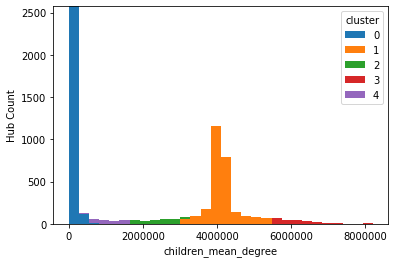

In [23]:
group_and_plot_hist(nodes_df, 'children_mean_degree', "cluster", 30)

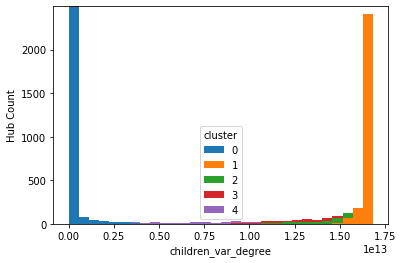

In [24]:
group_and_plot_hist(nodes_df, 'children_var_degree', "cluster", 30)

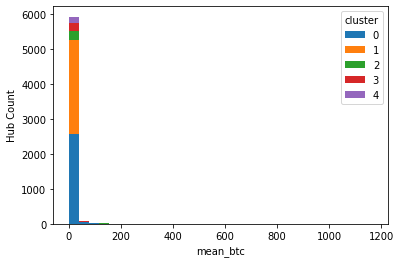

In [25]:
group_and_plot_hist(nodes_df, 'mean_btc', "cluster", 30)

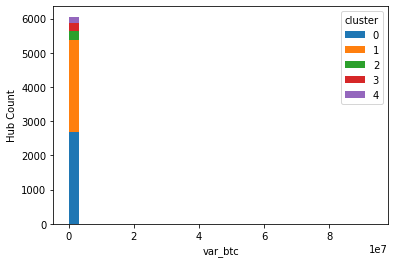

In [26]:
group_and_plot_hist(nodes_df, 'var_btc', "cluster", 30)

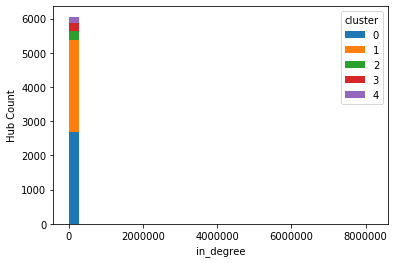

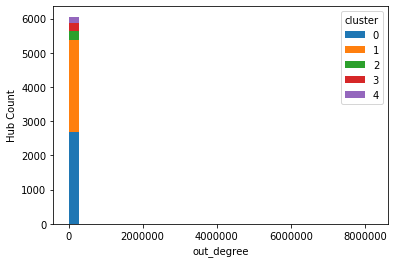

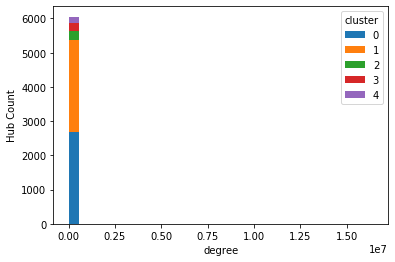

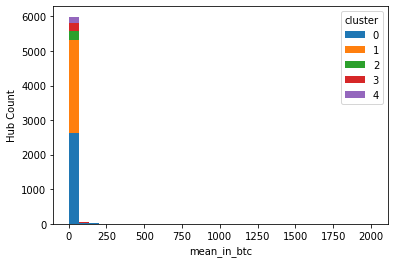

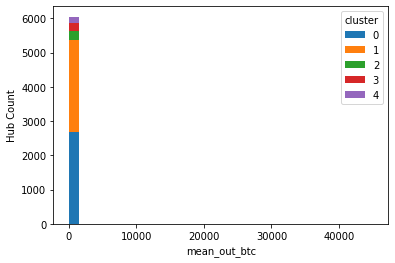

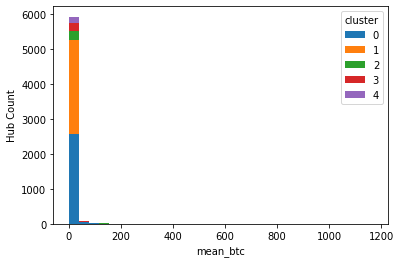

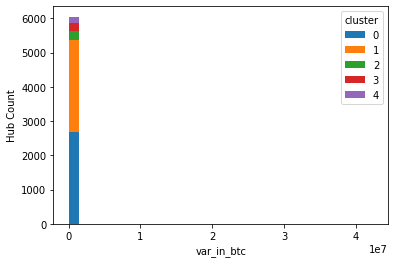

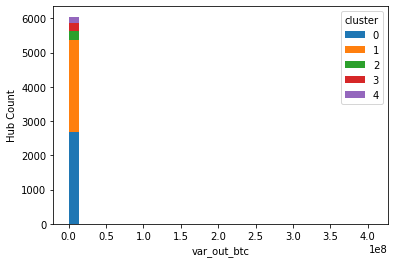

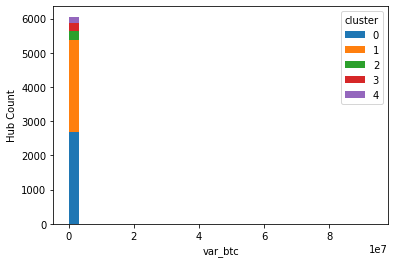

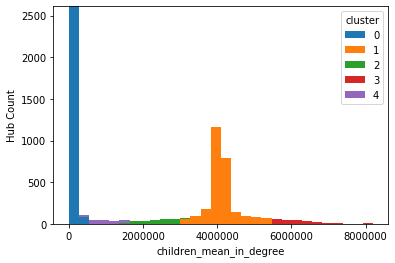

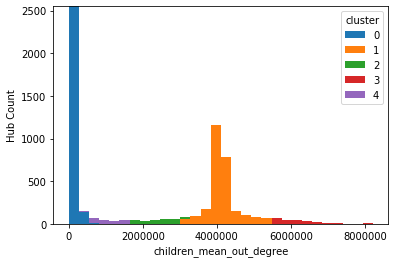

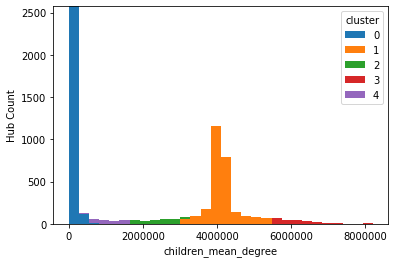

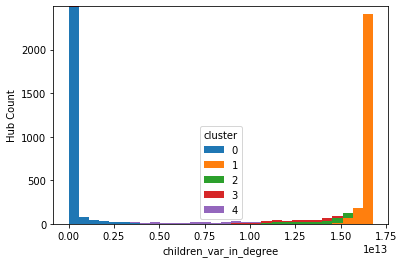

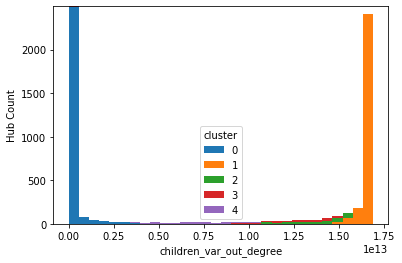

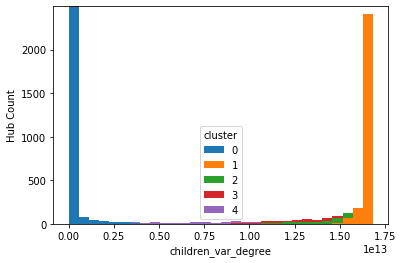

In [27]:
for feature in features:
    group_and_plot_hist(nodes_df, feature, "cluster", 30)

In [28]:
nodes_df.to_csv('uiuc_processed_nodes_or.csv', index=False)